#Importar Pacotes

In [1]:
!pip install ppscore

In [2]:
!pip install scikit-plot

In [3]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import pickle #biblioteca em que é possível salvar e carregar modelos
import pandas as pd

#Leitura e análise inicial dos dados

In [4]:
df = pd.read_csv('data.csv')
df
#target= diagnosis (maligno ou benignino)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#Dataframe Auxiliar
aux = pd.DataFrame({'colunas':df.columns, 'tipos':df.dtypes, 'missing': df.isna().sum(), 'size':df.shape[0], 'unicos':df.nunique()})
aux ['percentual'] = round(aux['missing'] / aux['size'],2)

In [7]:
aux

,colunas,tipos,missing,size,unicos,percentual
id,id,int64,0,569,569,0.0
diagnosis,diagnosis,object,0,569,2,0.0
radius_mean,radius_mean,float64,0,569,456,0.0
texture_mean,texture_mean,float64,0,569,479,0.0
perimeter_mean,perimeter_mean,float64,0,569,522,0.0
area_mean,area_mean,float64,0,569,539,0.0
smoothness_mean,smoothness_mean,float64,0,569,474,0.0
compactness_mean,compactness_mean,float64,0,569,537,0.0
concavity_mean,concavity_mean,float64,0,569,537,0.0
concave points_mean,concave points_mean,float64,0,569,542,0.0


In [8]:
df.drop(['Unnamed: 32','id'],1, inplace = True) #unnamed: valores faltantes, id:não é importante para o modelo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


#EDA - Exploratory Data Analysis

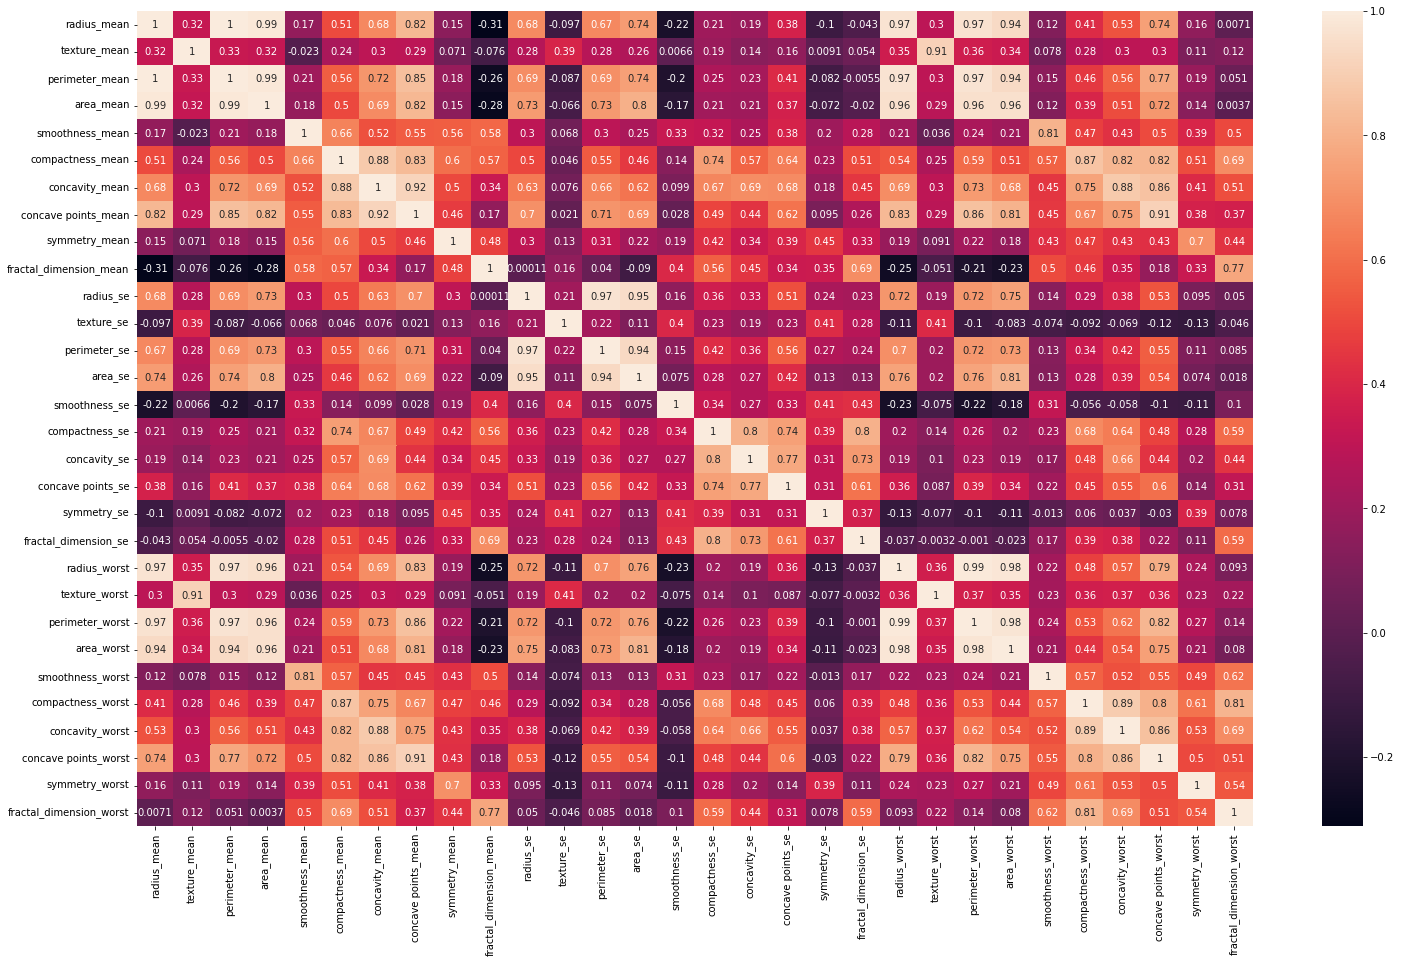

In [9]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot= True)
plt.show()

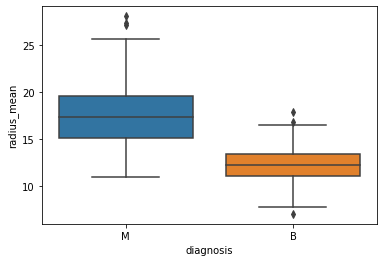

In [10]:
sns.boxplot(data=df, x='diagnosis', y='radius_mean')
plt.show()

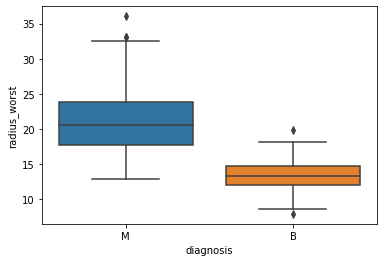

In [11]:
sns.boxplot(data=df, x='diagnosis', y='radius_worst')
plt.show()

In [12]:
df.value_counts('diagnosis')

diagnosis
B    357
M    212
dtype: int64

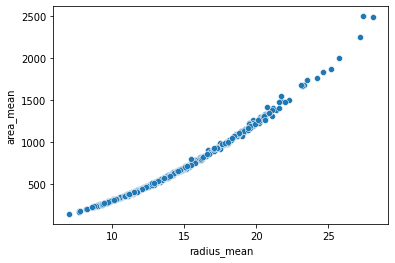

In [13]:
sns.scatterplot(data=df, x='radius_mean',y='area_mean')
#traça a media entre os dois valores (da pra ver que são bem correlacionados )

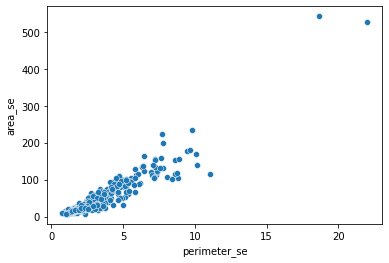

In [14]:
sns.scatterplot(data=df, x='perimeter_se',y='area_se')
plt.show()
#da pra enxergar alguns outlianers na direita

In [15]:
#para saber quem são os outlianers
df[df['area_se'] > 400]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
212,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,2.873,1.476,21.98,525.6,0.01345,0.02772,0.06389,0.01407,0.04783,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
461,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,0.05623,2.547,1.306,18.65,542.2,0.00765,0.05374,0.08055,0.02598,0.01697,0.004558,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


#Preparar dados para o modelo

In [16]:
df.loc[df['diagnosis'] == 'M', 'diagnosis'] = 1
df.loc[df['diagnosis'] == 'B', 'diagnosis'] = 0
#transforma os valores da coluna diagnosis em 0 ou 1 

In [17]:
X = df.drop('diagnosis',1) #dropando a variável target do eixo x, agora ela carrega todas as colunas menos a target
y = df['diagnosis'] #target

y = y.astype('int64') #transformando em inteiro por precaução

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [18]:
#os dados são separados em dados de treino e dados de validação

In [19]:
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
xtrain, xval, ytrain, yval = train_test_split (X, y, test_size = 0.33, random_state = 42)
#epmm: esse comando separa o x e o y em treino e teste
#test size: nos diz qual é a proporção de dados destinados a validação ou teste, no caso 0.33 para teste e 0.67 para treino
#random_state: repetitibilidade da solução

In [20]:
xtrain.shape, xval.shape, ytrain.shape, yval.shape
#epmm: train = treinar os modelos; val = ver como o modelo reage com dados novos

((381, 30), (188, 30), (381,), (188,))

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler() #primeiro cria um objeto para ele

xtrain_scaled = scaler.fit_transform(xtrain) #faz o treino e transforma a partir dele os dados de treino
xval_scaled = scaler.transform(xval)
pickle.dump(scaler, open('scaler.pk1','wb')) #salva o scaler

In [23]:
xtrain_scaled #os dados ficam meio desconfigurados, ou seja, já não é um df é uma array

array([[ 0.35581987, -1.72664707,  0.41303118, ...,  1.05652305,
         0.51844283,  0.98925483],
       [-0.37326674,  0.50881308, -0.39469992, ..., -0.89667412,
        -0.63236707, -0.11469617],
       [ 1.4033581 , -0.15144941,  1.34799923, ...,  1.46353548,
         1.02587412, -0.03369823],
       ...,
       [ 0.02898794, -0.56411347, -0.0829084 , ..., -1.2463348 ,
        -0.67979055, -1.26509354],
       [-0.05760855,  0.09614902, -0.04957475, ...,  1.05652305,
         0.45995387,  1.24414347],
       [-0.5604269 ,  0.30837625, -0.61462066, ..., -0.6145405 ,
        -0.30672581, -0.8357478 ]])

In [24]:
xtrain_scaled = pd.DataFrame(xtrain_scaled, columns= X.columns) #transforma em dataframe dnv e define as colunas como colunas de x, pois elas não alteraram o nome nem a ordem
xval_scaled = pd.DataFrame(xval_scaled, columns= X.columns)

In [25]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,0.4209,0.6583,2.805,44.64,0.005393,0.02321,0.04303,0.013200,0.01792,0.004168,18.79,17.04,125.00,1102.0,0.15310,0.3583,0.5830,0.18270,0.3216,0.10100
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,0.4993,1.7980,2.552,41.24,0.006011,0.04480,0.05175,0.013410,0.02669,0.007731,14.40,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151
56,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,0.7275,1.1930,4.837,102.50,0.006458,0.02306,0.02945,0.015380,0.01852,0.002608,26.14,28.14,170.10,2145.0,0.16240,0.3511,0.3879,0.20910,0.3537,0.08294
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,0.1532,0.7810,1.253,11.91,0.003796,0.01371,0.01346,0.007096,0.01536,0.001541,14.06,24.34,92.82,607.3,0.12760,0.2506,0.2028,0.10530,0.3035,0.07661
301,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,0.3642,1.0400,2.579,28.32,0.006530,0.03369,0.04712,0.014030,0.02740,0.004651,13.46,23.07,88.13,551.3,0.10500,0.2158,0.1904,0.07625,0.2685,0.07764


In [26]:
xtrain_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.355820,-1.726647,0.413031,0.206435,2.150290,1.003954,1.447046,1.593877,0.595127,1.105740,0.047550,-1.048641,-0.039673,0.074768,-0.533890,-0.120852,0.346288,0.192898,-0.318434,0.135247,0.511028,-1.409852,0.521794,0.373935,0.921112,0.722973,1.571401,1.056523,0.518443,0.989255
1,-0.373267,0.508813,-0.394700,-0.404509,-1.487959,-0.396650,-0.351529,-0.789623,-0.829284,-0.209972,0.314451,1.120800,-0.157759,0.006285,-0.338031,1.065434,0.631646,0.226117,0.761711,1.459848,-0.392232,0.241384,-0.473485,-0.414070,-1.632042,-0.371199,-0.432654,-0.896674,-0.632367,-0.114696
2,1.403358,-0.151449,1.347999,1.346734,0.671504,0.446346,0.548645,1.076488,0.414308,-0.420762,1.091322,-0.030829,0.908756,1.240189,-0.196366,-0.129094,-0.098110,0.537736,-0.244536,-0.444707,2.023321,0.428535,1.866926,2.175532,1.323014,0.675140,0.591964,1.463535,1.025874,-0.033698
3,-0.479417,-0.448568,-0.483319,-0.499007,-0.489778,-0.529469,-0.670468,-0.658181,-1.028554,-0.303656,-0.863793,-0.815079,-0.764063,-0.584483,-1.040016,-0.642840,-0.621375,-0.772648,-0.633733,-0.841381,-0.462189,-0.200822,-0.437993,-0.480572,-0.180875,0.007476,-0.337271,-0.136763,0.232321,-0.392242
4,-0.482211,0.159817,-0.484132,-0.523181,-0.835553,-0.043498,-0.262323,-0.467040,-0.087557,-0.023982,-0.145476,-0.322067,-0.145157,-0.253951,-0.173548,0.454983,0.480132,0.324190,0.849157,0.314810,-0.585641,-0.411160,-0.577874,-0.577302,-1.157539,-0.223715,-0.399521,-0.584631,-0.320953,-0.333900


In [27]:
def preprocess (df):
  X = df.drop('diagnosis',1)
  y = df['diagnosis']
  y = y.astype('int64')
  xtrain, xval, ytrain, yval = train_test_split (X,y, test_size = 0.33, random_state = 42)
  scaler = StandardScaler()
  xtrain_scaled = scaler.fit_transform(xtrain)
  xval_scaled = scaler.transform(xval)

  pickle.dump(scaler, open('scaler.pk1', 'wb'))
  xtrain_scaled = pd.DataFrame(xtrain_scaled, columns= X.columns) #transforma em dataframe dnv e define as colunas como colunas de x, pois elas não alteraram o nome nem a ordem
  xval_scaled = pd.DataFrame(xval_scaled, columns= X.columns)

  return xtrain_scaled,xval_scaled,ytrain,yval
#função pronta para pré processamento

##MACHINE LEARNING

SVC

In [28]:
from sklearn.svm import SVC
#é um vetor de classificação

In [29]:
svc = SVC(probability=True)
#é uma instância

svc.fit(xtrain_scaled, ytrain)
#treinando o modelo com dados de treino

SVC(probability=True)

In [30]:
pred = svc.predict(xval_scaled)
#predição

In [31]:
prob = svc.predict_proba(xval_scaled)
#probabilidade

In [32]:
pred[:10]

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [33]:
prob[:10]

array([[9.75662667e-01, 2.43373326e-02],
       [7.71223390e-07, 9.99999229e-01],
       [2.87228747e-03, 9.97127713e-01],
       [9.99747031e-01, 2.52969196e-04],
       [9.99863929e-01, 1.36070827e-04],
       [2.54419660e-02, 9.74558034e-01],
       [1.45144245e-05, 9.99985486e-01],
       [1.11999819e-01, 8.88000181e-01],
       [3.50261068e-01, 6.49738932e-01],
       [9.87771918e-01, 1.22280820e-02]])

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yval, pred)
#linha de cima = negativo
#linha de baixo = positivo
#eixo principal = 117(vn) e 65(vp)
#outro eixo = 2(fn) e 4(fp)
#linha de baixo nos mostra a soma do quanto de verdadeiro estamos calculando, ou seja, 65+2=67, o modelo acertou 65 predições


array([[117,   4],
       [  2,  65]])

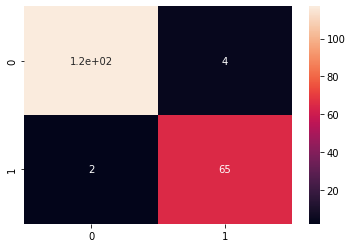

In [35]:
sns.heatmap(confusion_matrix(yval, pred),annot = True)

In [36]:
from sklearn.metrics import classification_report
print (classification_report(yval, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       121
           1       0.94      0.97      0.96        67

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


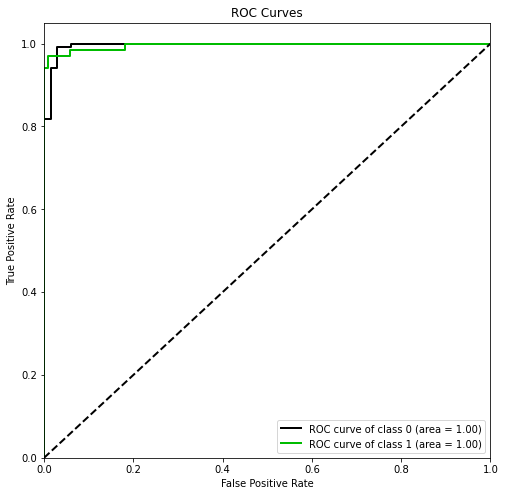

In [37]:
skplt.metrics.plot_roc_curve(yval, prob, figsize= (8,8), curves='each_class')
plt.show()
#curva ROC= mostra a variação de acordo com a alteração do linear
#eixo y --> verdadeiro positivo
#eixo x --> falso positivo 

Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xtrain_scaled, ytrain)
#modelo baseado em árvore de decisão

RandomForestClassifier()

In [39]:
pred = rf.predict(xval_scaled)

In [40]:
prob = rf.predict_proba(xval_scaled)

In [41]:
confusion_matrix(yval, pred)

array([[117,   4],
       [  5,  62]])

In [42]:
print (classification_report(yval, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       121
           1       0.94      0.93      0.93        67

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


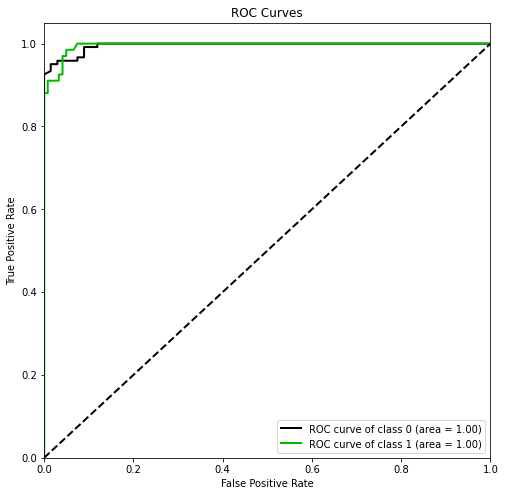

In [43]:
skplt.metrics.plot_roc_curve(yval, prob, figsize=(8,8), curves='each_class')

In [44]:
rf.estimators_[5]

DecisionTreeClassifier(max_features='auto', random_state=1634174005)

In [45]:
from sklearn.tree import export_graphviz
from IPython.display import Image

def plot_tree(rf):
  estimators = rf.estimators_[5]

  export_graphviz(estimators, out_file='tree_limited.dot', feature_names = xtrain_scaled.columns,
                  class_names = ['0','1'],
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  !dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600
  return Image (filename = 'tree_limited.png', width = 1200, height = 700)

In [46]:
plot_tree(rf)

Output hidden; open in https://colab.research.google.com to view.

In [47]:
rf.feature_importances_

array([0.03489699, 0.01502959, 0.03229049, 0.02330009, 0.00684066,
       0.00443649, 0.06280216, 0.18477431, 0.00179636, 0.00403891,
       0.01261873, 0.00387365, 0.01486629, 0.0228303 , 0.0064538 ,
       0.00297678, 0.00500417, 0.00654036, 0.00433131, 0.00698214,
       0.07181483, 0.01510254, 0.14462072, 0.07324422, 0.01136651,
       0.01926209, 0.07069932, 0.12385121, 0.0099301 , 0.00342486])

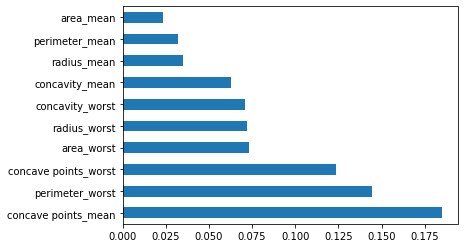

In [48]:
feature_importances = pd.Series(rf.feature_importances_, index = X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()
#plot das 10 variaveis mais importantes

SHAP

In [49]:
!pip install shap

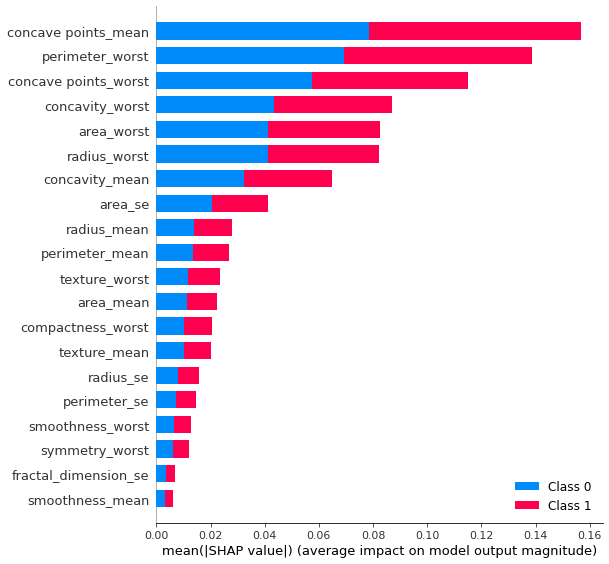

In [50]:
import shap
shap_values = shap.TreeExplainer(rf).shap_values(xtrain_scaled)
shap.summary_plot(shap_values, xtrain_scaled, plot_type='bar')
#gráfico que mostra a importância das variáveis para cada classe com gráficos e cálculos mais confiáveis

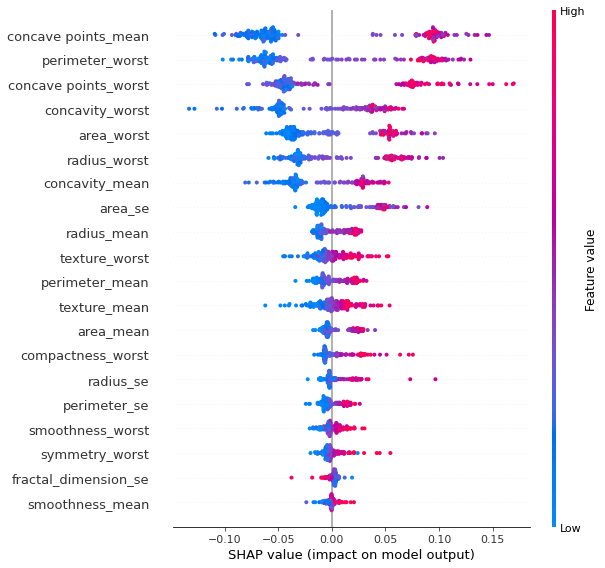

In [51]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values (xval_scaled)
shap.summary_plot(shap_values[1], xval_scaled)

#Simplificando e melhorando o modelo

In [75]:
feature_importances.sort_values(ascending=False)

concave points_mean        0.184774
perimeter_worst            0.144621
concave points_worst       0.123851
area_worst                 0.073244
radius_worst               0.071815
concavity_worst            0.070699
concavity_mean             0.062802
radius_mean                0.034897
perimeter_mean             0.032290
area_mean                  0.023300
area_se                    0.022830
compactness_worst          0.019262
texture_worst              0.015103
texture_mean               0.015030
perimeter_se               0.014866
radius_se                  0.012619
smoothness_worst           0.011367
symmetry_worst             0.009930
fractal_dimension_se       0.006982
smoothness_mean            0.006841
concave points_se          0.006540
smoothness_se              0.006454
concavity_se               0.005004
compactness_mean           0.004436
symmetry_se                0.004331
fractal_dimension_mean     0.004039
texture_se                 0.003874
fractal_dimension_worst    0

In [76]:
cols = list(feature_importances.sort_values(ascending=False)[:15].index)

In [77]:
cols.append('diagnosis')

In [78]:
df_simples = df[cols]

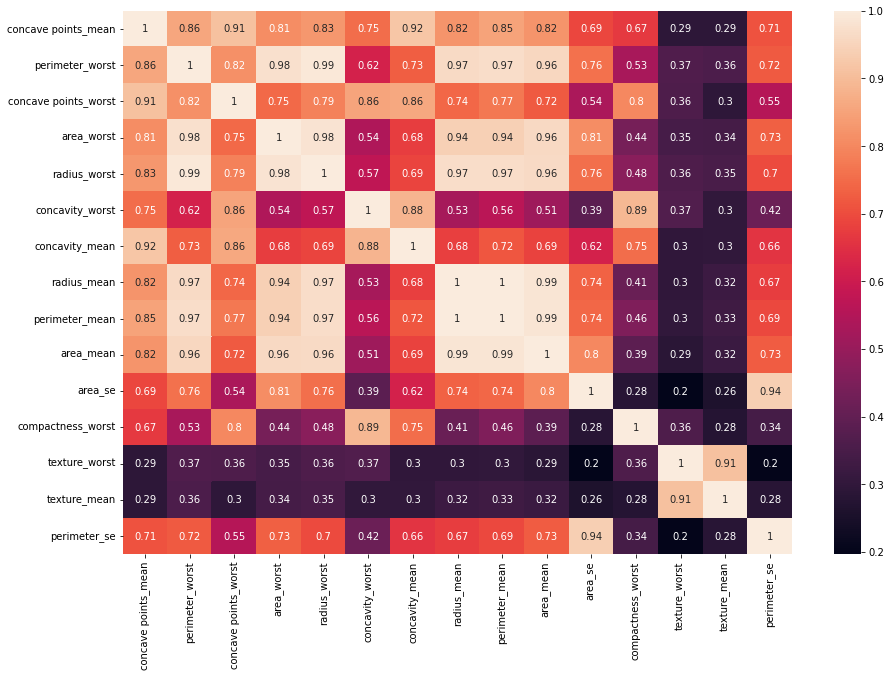

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(df_simples.corr(), annot= True)

In [80]:
drop = ['perimeter_worst','area_worst','perimeter_mean','area_mean','perimeter_se','area_se']
df_simples = df_simples.drop(drop,1)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


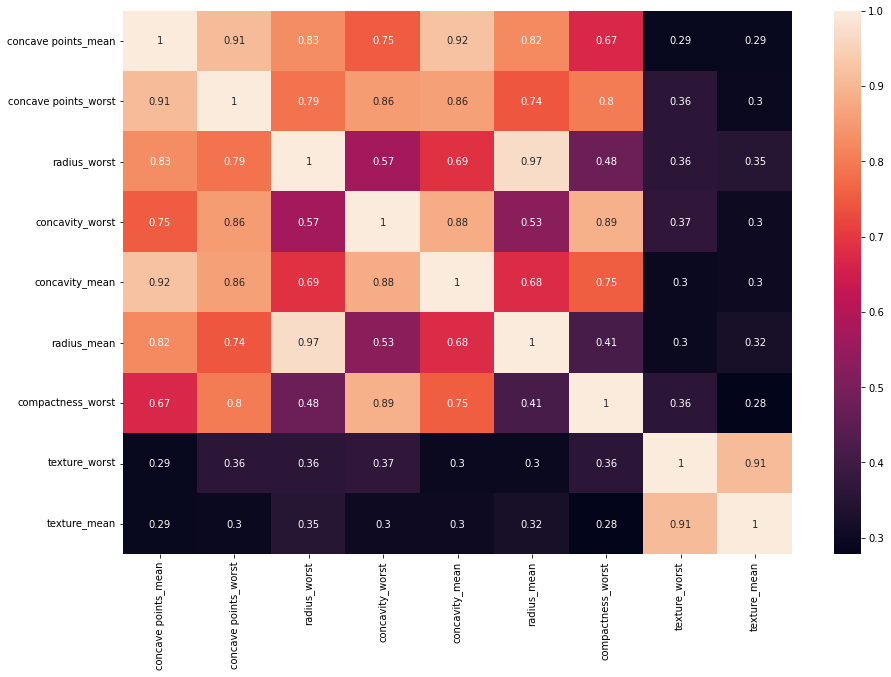

In [81]:
plt.figure(figsize=(15,10))
sns.heatmap(df_simples.corr(), annot= True)

In [82]:
df_simples.head()

,concave points_mean,concave points_worst,radius_worst,concavity_worst,concavity_mean,radius_mean,compactness_worst,texture_worst,texture_mean,diagnosis
0,0.14710,0.2654,25.38,0.7119,0.3001,17.99,0.6656,17.33,10.38,1
1,0.07017,0.1860,24.99,0.2416,0.0869,20.57,0.1866,23.41,17.77,1
2,0.12790,0.2430,23.57,0.4504,0.1974,19.69,0.4245,25.53,21.25,1
3,0.10520,0.2575,14.91,0.6869,0.2414,11.42,0.8663,26.50,20.38,1
4,0.10430,0.1625,22.54,0.4000,0.1980,20.29,0.2050,16.67,14.34,1


In [83]:
xtrain_scaled, xval_scaled, ytrain, yval = preprocess(df_simples)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


#SVC

In [61]:
svc = SVC()
svc.fit(xtrain_scaled, ytrain)
pred = svc.predict(xval_scaled)

In [62]:
print(classification_report(yval,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       121
           1       0.96      0.96      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [63]:
confusion_matrix(yval,pred)

array([[118,   3],
       [  3,  64]])

#Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain_scaled, ytrain)
pred = rf.predict(xval_scaled)

In [65]:
print(classification_report(yval, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       121
           1       0.95      0.93      0.94        67

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



In [66]:
confusion_matrix(yval,pred)

array([[118,   3],
       [  5,  62]])

#Random Search

SVM

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
params_svm = [{'kernel' : ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9], 'C': [1,10,100,1000,10000], 'probability':[True]}]
svc_random = RandomizedSearchCV(estimator = svc, param_distributions= params_svm, n_iter=10)
#de acordo com a quantidade de iterações escolhida, ele pega combinações aleatórias dos paarâmetros e testa eles para ver qual performa melhor
svc_random.fit(xtrain_scaled,ytrain)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions=[{'C': [1, 10, 100, 1000, 10000],
                                         'gamma': [0.0001, 0.001, 0.01, 0.1,
                                                   0.2, 0.5, 0.6, 0.9],
                                         'kernel': ['rbf'],
                                         'probability': [True]}])

In [69]:
svc_random.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf', 'probability': True}

In [70]:
pred = svc_random.predict(xval_scaled)

In [71]:
print(classification_report(yval,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       121
           1       0.96      0.97      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [72]:
confusion_matrix(yval, pred)

array([[118,   3],
       [  2,  65]])

#Salvando o modelo

In [73]:
pickle.dump(svc_random, open('svc.sav','wb'))

In [74]:
df_simples.head()

,concave points_mean,concave points_worst,radius_worst,concavity_worst,concavity_mean,radius_mean,compactness_worst,texture_worst,texture_mean,diagnosis
0,0.14710,0.2654,25.38,0.7119,0.3001,17.99,0.6656,17.33,10.38,1
1,0.07017,0.1860,24.99,0.2416,0.0869,20.57,0.1866,23.41,17.77,1
2,0.12790,0.2430,23.57,0.4504,0.1974,19.69,0.4245,25.53,21.25,1
3,0.10520,0.2575,14.91,0.6869,0.2414,11.42,0.8663,26.50,20.38,1
4,0.10430,0.1625,22.54,0.4000,0.1980,20.29,0.2050,16.67,14.34,1
